#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#### Utility functions

In [2]:
def plot_loss_epoch(loss, alpha):
    plt.figure(figsize=(10, 8))
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.figure(figsize=(10, 8))
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

## Multivariate

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,X, and x3.
#### The last column is the target label y.

In [3]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [4]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [5]:
X = data[:, :-1]
y = data[:, -1]

In [6]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [7]:
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [8]:
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [9]:
y = y.reshape(len(y), 1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

## BFGS

#### Full Batch

In [10]:
def BFGS_multi_variable_batch(X, y, maxNumIters, alpha=1, ones=False):

  if ones:
    X = np.insert(X, 0, 1, axis=1)

  # 1- Initialize parameters and hyper-paramters
  theta_prev = np.array(X.shape[1] * [[0.1]])
  theta_cur = np.zeros((X.shape[1], 1))

  I = np.eye(X.shape[1])
  B_inv = np.eye(X.shape[1])
  
  loss_threshold = 1e-6

  theta_list = []
  cost = []
  hypothesis = []
  for i in range(maxNumIters):
      print(f'****************** Iteration {i} ********************')
      print()

      theta_list.append(theta_cur)


      m = len(X)

      # 2- Prediction
      h_cur = X @ theta_cur
      h_prev = X @ theta_prev
      hypothesis.append(h_cur)


      # 3- Evaluate Prediction (Calculate loss/cost function)
      error_cur = h_cur - y
      error_prev = h_prev - y

      # j = np.sum(error_cur**2) / (2*m) # --> Normal equation
      # j = np.linalg.norm(error_cur)**2 / (2*m) # --> By vector Norm
      j = error_cur.T @ error_cur / (2*m) # --> By dot product

      cost.append(j.squeeze())

      # 4- Get gradient
      d_theta_cur = X.T @ error_cur / m
      d_theta_prev = X.T @ error_prev / m
      
      d_theta_cur_norm = np.linalg.norm(d_theta_cur)

      # 5- Update parameters
      delta_theta = theta_cur - theta_prev
      delta_y = d_theta_cur - d_theta_prev
      B_inv = (I - ((delta_theta @ delta_y.T) / (delta_y.T @ delta_theta))) @ B_inv @ (I -
                                                                    ((delta_y @ delta_theta.T) / (delta_y.T @ delta_theta))) + ((delta_theta @ delta_theta.T) / (delta_y.T @ delta_theta))
      theta_prev = theta_cur
      theta_cur = theta_cur - alpha * (B_inv @ d_theta_cur)

      print('h(x):\n', h_cur)
      print()
      
      print('Error Vector:\n', error_cur)
      print()
      
      print('j = ', j)
      print()

      print('Gradient Vector:\n', d_theta_cur)
      print()
      
      print('Gradient Vector Norm:\n', d_theta_cur_norm)
      print()

      if abs(np.linalg.norm(d_theta_cur)) <= loss_threshold:
          break
      
      print('thetas_new : \n ', theta_cur)
      print()


  print('****************** Training Report ********************')
  print()

  print(f'Gradient Descent converged after {i} iterations')
  print()

  print('theta_Opt : \n', theta_cur)
  print()

  print('Error Vector:\n', error_cur)
  print()

  print('Cost = ', j)
  print()

  print('h(x) = y_predict:\n', h_cur)
  print()

  print('y_actual:\n', y)

  return theta_list, cost, hypothesis, theta_list[-1]



#### Mini Batch

In [11]:
def BFGS_multi_variable_mini_batch(X, y, maxNumIters, alpha=1, batch_size=None, ones=False):

  # if batch not specified, consider it as full batch
  if not batch_size:
    batch_size = len(X)

  # Append ones to first columns if 'ones' parameter is true
  if ones:
    X = np.insert(X, 0, 1, axis=1)

  # 1- Initialize parameters and hyper-paramters
  theta_cur = np.array(X.shape[1] * [[0.01]])
  theta_prev = np.zeros((X.shape[1], 1))

  I = np.eye(X.shape[1])
  B_inv = np.eye(X.shape[1])
  
  loss_threshold = 1e-6

  theta_list = []
  cost = []
  hypothesis = []
  for epoch in range(maxNumIters):
      print(f'****************** Iteration {epoch} ********************')
      print()

      for i in range(len(X) // batch_size):

        theta_list.append(theta_cur)

        # 2- Prediction
        start = i * batch_size
        end = i * batch_size + batch_size

        h_cur = X[start:end] @ theta_cur
        h_prev = X[start:end] @ theta_prev
        hypothesis.append(h_cur)


        # 3- Evaluate Prediction (Calculate loss/cost function)
        error_cur = h_cur - y[start:end]
        error_prev = h_prev - y[start:end]

        # j = np.sum(error_cur**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error_cur)**2 / (2*m) # --> By vector Norm
        j = error_cur.T @ error_cur / (2*batch_size) # --> By dot product

        cost.append(j.squeeze())

        # 4- Get gradient
        d_theta_cur = X[start:end].T @ error_cur / batch_size
        d_theta_prev = X[start:end].T @ error_prev / batch_size
        
        d_theta_cur_norm = np.linalg.norm(d_theta_cur)

        # 5- Update parameters
        delta_theta = theta_cur - theta_prev
        delta_y = d_theta_cur - d_theta_prev
        B_inv = (I - ((delta_theta @ delta_y.T) / (delta_y.T @ delta_theta))) @ B_inv @ (I -
                                                                      ((delta_y @ delta_theta.T) / (delta_y.T @ delta_theta))) + ((delta_theta @ delta_theta.T) / (delta_y.T @ delta_theta))
        theta_prev = theta_cur
        theta_cur = theta_cur - alpha * (B_inv @ d_theta_cur)

      print('h(x):\n', h_cur)
      print()
      
      print('Error Vector:\n', error_cur)
      print()
      
      print('j = ', j)
      print()

      print('Gradient Vector:\n', d_theta_cur)
      print()
      
      print('Gradient Vector Norm:\n', d_theta_cur_norm)
      print()

      if abs(np.linalg.norm(d_theta_cur)) <= loss_threshold:
          break
      
      print('thetas_new : \n ', theta_cur)
      print()


  print('****************** Training Report ********************')
  print()

  print(f'Gradient Descent converged after {epoch} iterations')
  print()

  print('theta_Opt : \n', theta_cur)
  print()

  print('Error Vector:\n', error_cur)
  print()

  print('Cost = ', j)
  print()

  print('h(x) = y_predict:\n', h_cur)
  print()

  print('y_actual:\n', y)

  return theta_list, cost, hypothesis, theta_list[-1]



### Play with the parameters and see the results

##### The following results uses alpha = 0.05 and max. iterations = 500.

In [12]:
alpha = 0.05
iterations = 500
theta_list, cost, hypothesis, theta_opt = BFGS_multi_variable_batch(X, y, iterations, alpha)

Streaming output truncated to the last 5000 lines.
 [-0.42257563]
 [-0.33634193]
 [-7.31110588]
 [ 1.63279853]
 [-0.80458813]]

j =  [[2.86890357]]

Gradient Vector:
 [[2.17794073e-07]
 [1.75216709e-05]
 [1.72915375e-05]
 [1.81497200e-05]]

Gradient Vector Norm:
 3.058538849222671e-05

thetas_new : 
  [[-4.33610238]
 [ 0.35593823]
 [ 0.54251875]
 [ 1.16744422]]

****************** Iteration 417 ********************

h(x):
 [[152.60720451]
 [185.080115  ]
 [181.78158567]
 [199.7452267 ]
 [139.17472094]
 [103.69391817]
 [150.26322758]
 [112.8206974 ]
 [174.55948427]
 [164.49442131]
 [143.4233757 ]
 [142.23416442]
 [186.54285777]
 [152.40794541]
 [151.24409128]
 [189.12496642]
 [143.50219233]
 [181.89389379]
 [177.29838929]
 [158.34934032]
 [176.57742436]
 [174.66365806]
 [167.68889411]
 [150.63279852]
 [191.19541185]]

Error Vector:
 [[ 0.60720451]
 [ 0.080115  ]
 [ 1.78158567]
 [ 3.7452267 ]
 [-2.82527906]
 [ 2.69391817]
 [ 1.26322758]
 [-2.1793026 ]
 [-0.44051573]
 [ 0.49442131]
 [ 2.4

In [13]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9896615789448399


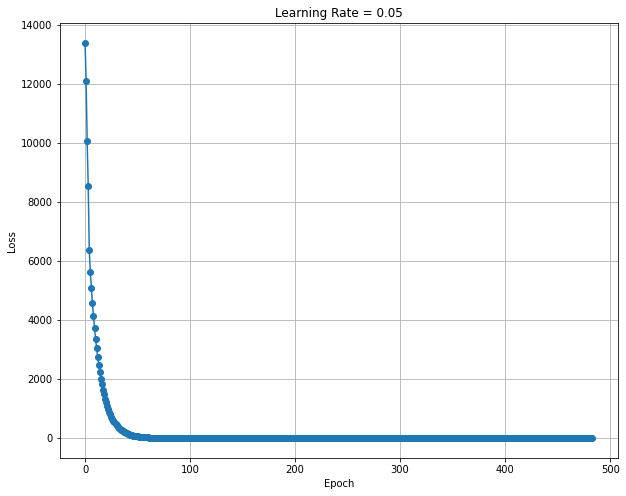

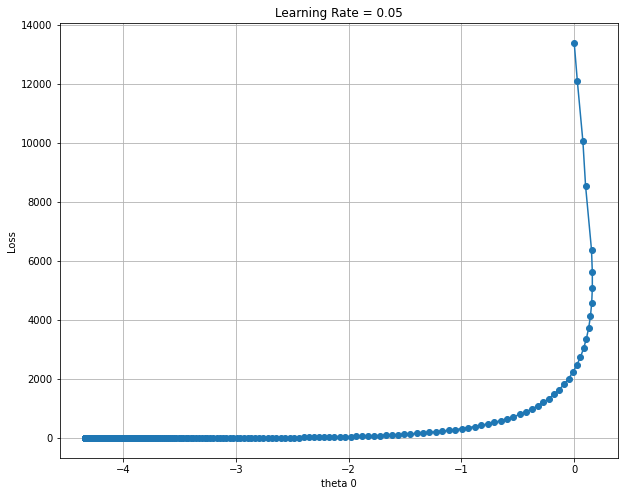

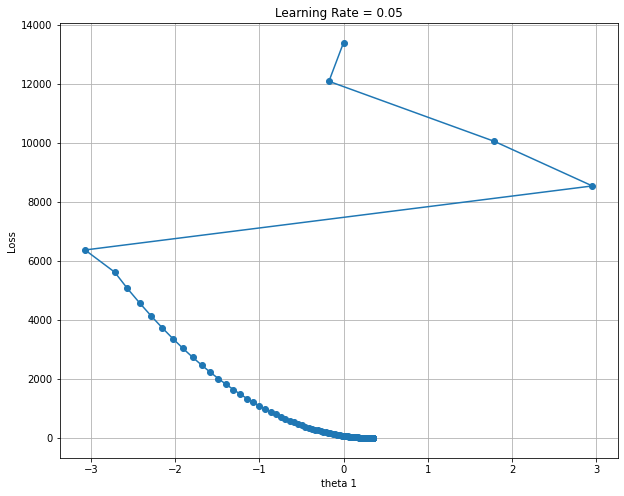

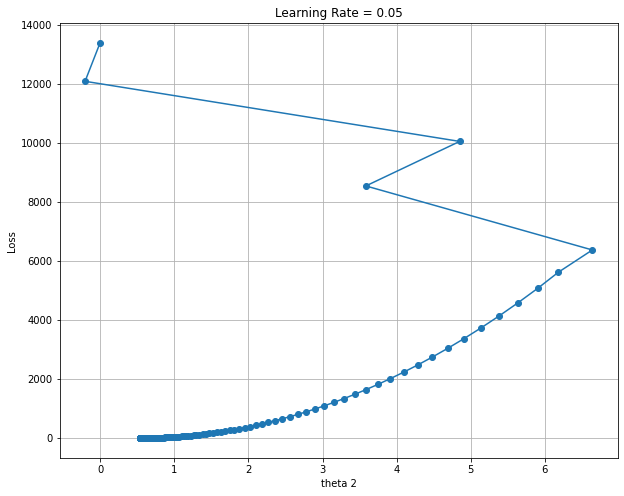

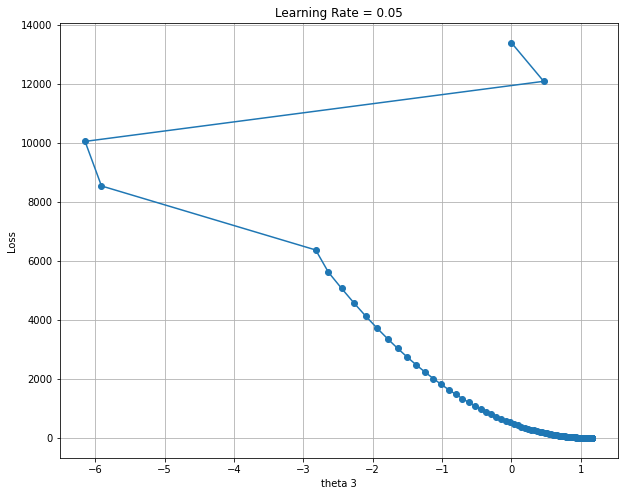

In [14]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.005 and max. iterations = 500.

In [15]:
alpha = 0.005
iterations = 500
theta_list, cost, hypothesis, theta_opt = BFGS_multi_variable_batch(X, y, iterations, alpha)

Streaming output truncated to the last 5000 lines.
j =  [[172.6801203]]

Gradient Vector:
 [[  -18.23300178]
 [-1471.44971469]
 [-1477.37193046]
 [-1516.24965351]]

Gradient Vector Norm:
 2578.204324309078

thetas_new : 
  [[-3.69841118]
 [ 0.27856964]
 [ 0.56597596]
 [ 0.98913428]]

****************** Iteration 433 ********************

h(x):
 [[136.10032001]
 [164.00393744]
 [161.62018394]
 [177.4233459 ]
 [123.23098518]
 [ 91.50305906]
 [133.56845425]
 [100.43707222]
 [154.27133314]
 [144.97072384]
 [127.3480133 ]
 [125.78583742]
 [165.98750061]
 [135.79346928]
 [134.27018221]
 [167.53731623]
 [127.73934845]
 [161.79305371]
 [157.95105315]
 [141.16936463]
 [156.84031667]
 [154.70155711]
 [149.08243885]
 [134.67741969]
 [169.64779471]]

Error Vector:
 [[-15.89967999]
 [-20.99606256]
 [-18.37981606]
 [-18.5766541 ]
 [-18.76901482]
 [ -9.49694094]
 [-15.43154575]
 [-14.56292778]
 [-20.72866686]
 [-19.02927616]
 [-13.6519867 ]
 [-15.21416258]
 [-18.01249939]
 [-16.20653072]
 [-13.729817

In [16]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.677055471769695


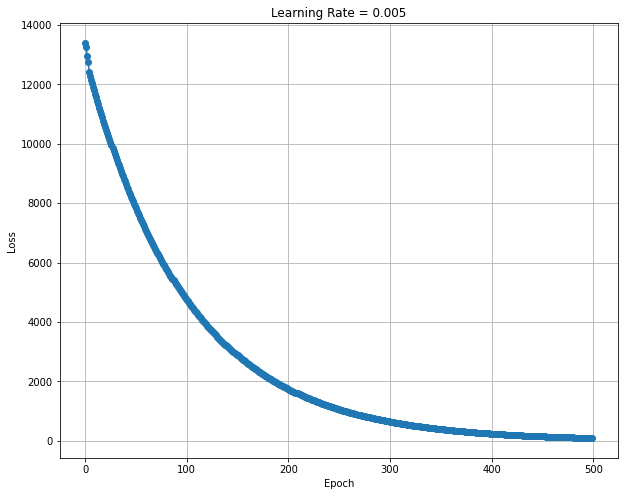

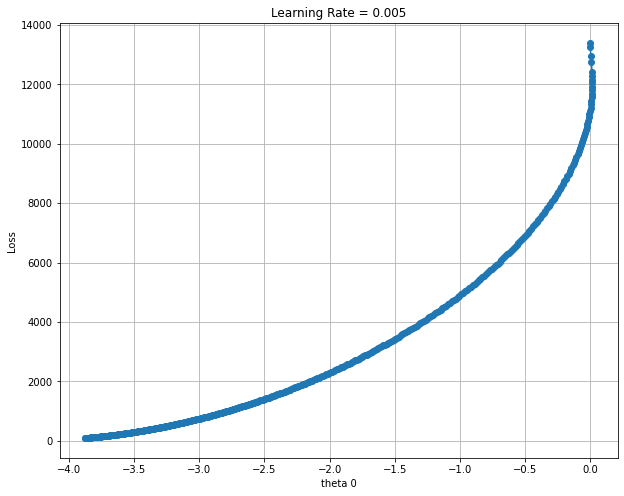

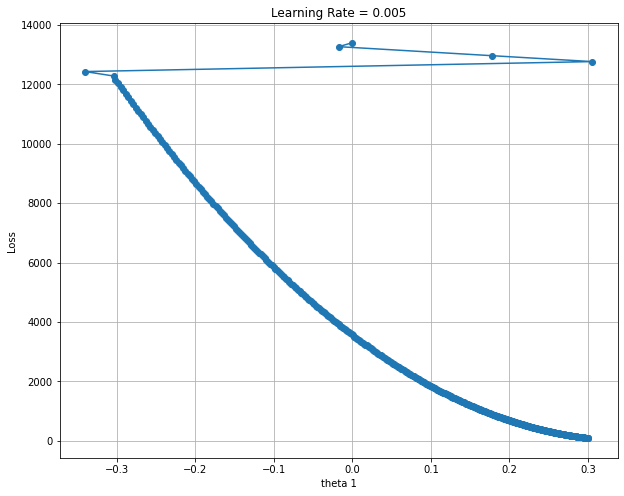

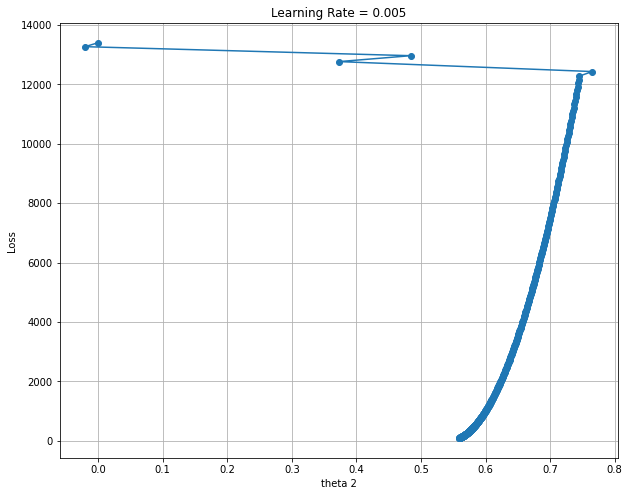

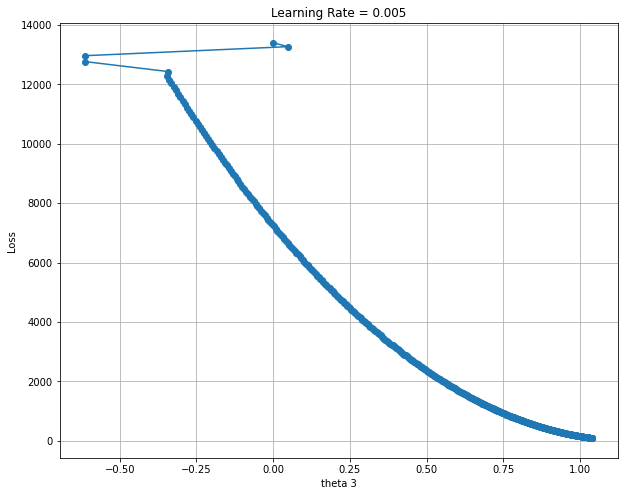

In [17]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.0005 and max. iterations = 5000.

In [18]:
alpha = 0.0005
iterations = 5000
theta_list, cost, hypothesis, theta_opt = BFGS_multi_variable_batch(X, y, iterations, alpha)

Streaming output truncated to the last 5000 lines.
j =  [[99.05031873]]

Gradient Vector:
 [[  -13.72664025]
 [-1107.6767981 ]
 [-1113.56959374]
 [-1140.87993309]]

Gradient Vector Norm:
 1941.3347396916436

thetas_new : 
  [[-3.95956214]
 [ 0.32303592]
 [ 0.50282467]
 [ 1.06507758]]

****************** Iteration 4933 ********************

h(x):
 [[139.72885223]
 [169.38356444]
 [166.40466203]
 [182.83646196]
 [127.36391894]
 [ 94.87054339]
 [137.54991565]
 [103.28596245]
 [159.72469412]
 [150.48482953]
 [131.27830666]
 [130.1522968 ]
 [170.77318199]
 [139.53691262]
 [138.43520448]
 [173.08162184]
 [131.37436545]
 [166.5127827 ]
 [162.32414048]
 [144.98266101]
 [161.62928721]
 [159.84505464]
 [153.50328162]
 [137.94612371]
 [174.99695072]]

Error Vector:
 [[-12.27114777]
 [-15.61643556]
 [-13.59533797]
 [-13.16353804]
 [-14.63608106]
 [ -6.12945661]
 [-11.45008435]
 [-11.71403755]
 [-15.27530588]
 [-13.51517047]
 [ -9.72169334]
 [-10.8477032 ]
 [-13.22681801]
 [-12.46308738]
 [ -9.5647

In [19]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.6655277047303405


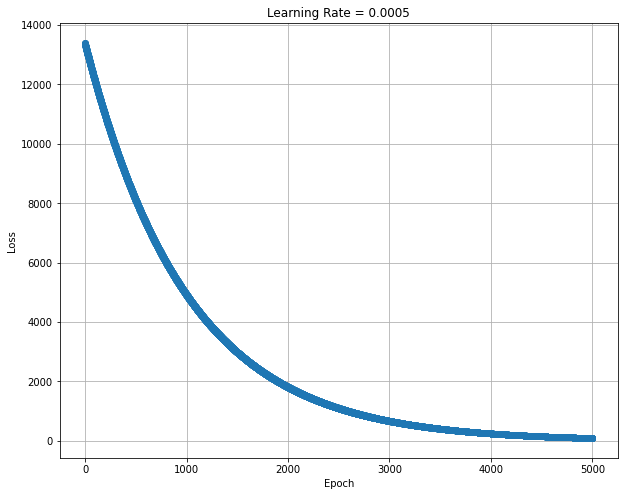

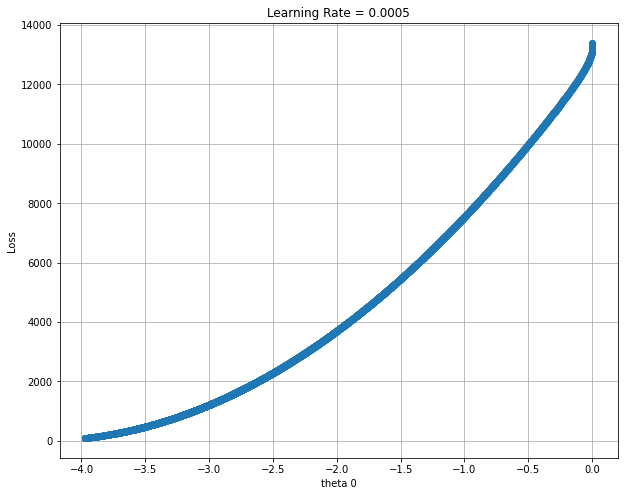

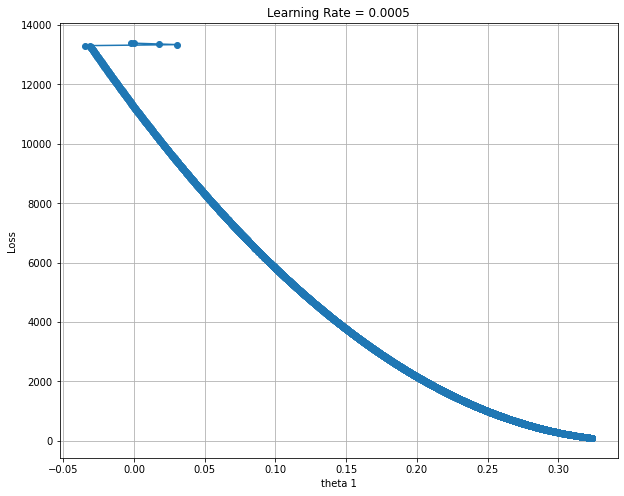

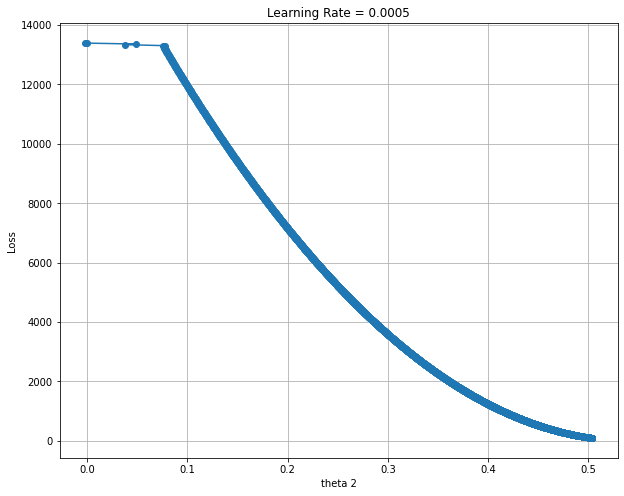

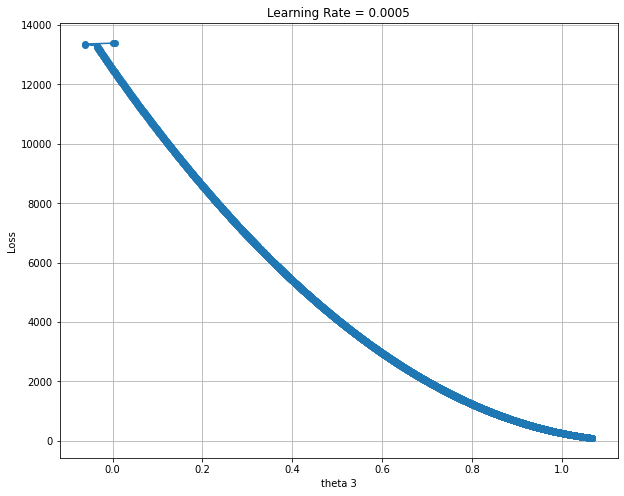

In [20]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.001 and max. iterations = 5000.

In [21]:
alpha = 0.001
iterations = 5000
theta_list, cost, hypothesis, theta_opt = BFGS_multi_variable_batch(X, y, iterations, alpha)

Streaming output truncated to the last 5000 lines.
j =  [[3.55740464]]

Gradient Vector:
 [[ -1.16136124]
 [-93.71716885]
 [-94.20250982]
 [-96.53122574]]

Gradient Vector Norm:
 164.2456906502719

thetas_new : 
  [[-4.30343207]
 [ 0.3529207 ]
 [ 0.53969213]
 [ 1.15848857]]

****************** Iteration 4933 ********************

h(x):
 [[151.52179302]
 [183.75053849]
 [180.48246636]
 [198.31564195]
 [138.17366028]
 [102.94407492]
 [149.18893455]
 [112.01591491]
 [173.30031934]
 [163.30274736]
 [142.39621172]
 [141.20916033]
 [185.21140628]
 [151.3223401 ]
 [150.16065169]
 [187.76569634]
 [142.47851585]
 [180.59487431]
 [176.03528349]
 [157.22245009]
 [175.31356076]
 [173.40798646]
 [166.49035868]
 [149.56567724]
 [189.82473841]]

Error Vector:
 [[-0.47820698]
 [-1.24946151]
 [ 0.48246636]
 [ 2.31564195]
 [-3.82633972]
 [ 1.94407492]
 [ 0.18893455]
 [-2.98408509]
 [-1.69968066]
 [-0.69725264]
 [ 1.39621172]
 [ 0.20916033]
 [ 1.21140628]
 [-0.6776599 ]
 [ 2.16065169]
 [-4.23430366]
 [-4

In [22]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9874917859428942


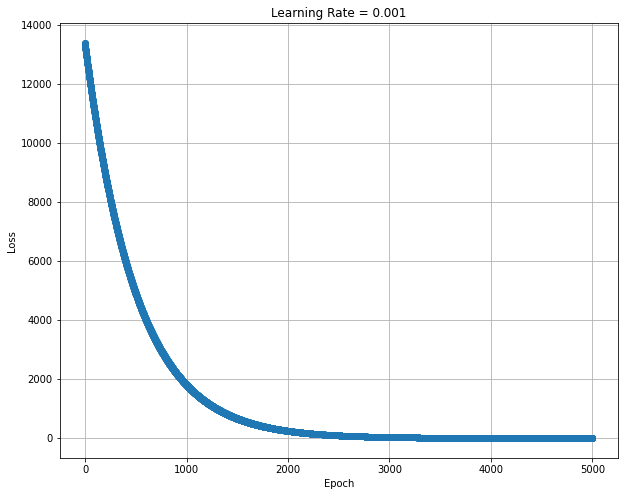

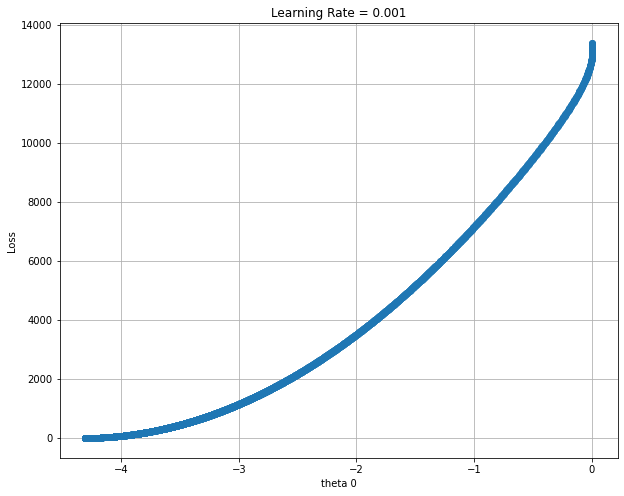

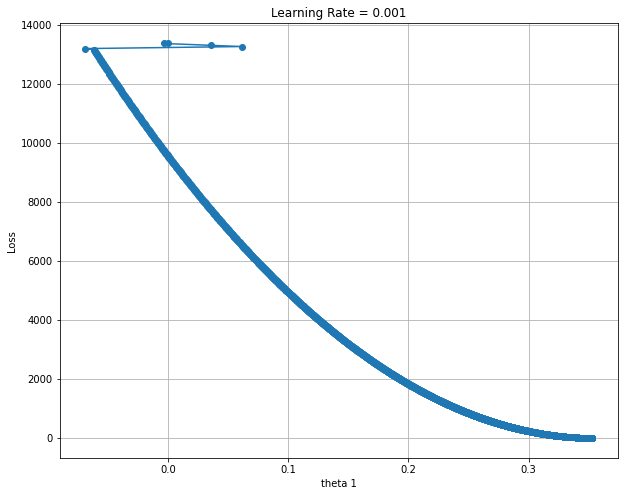

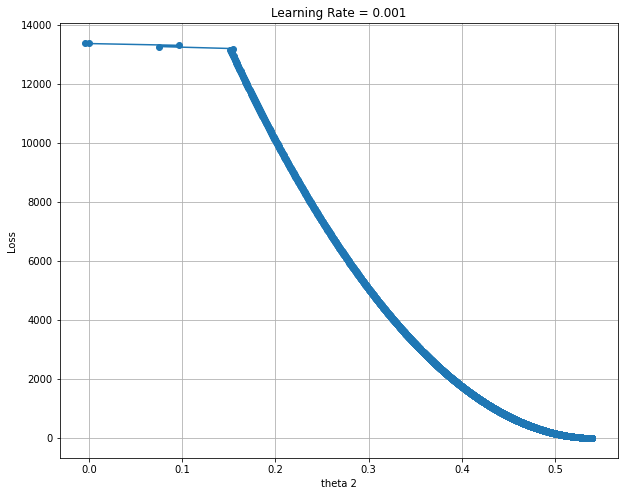

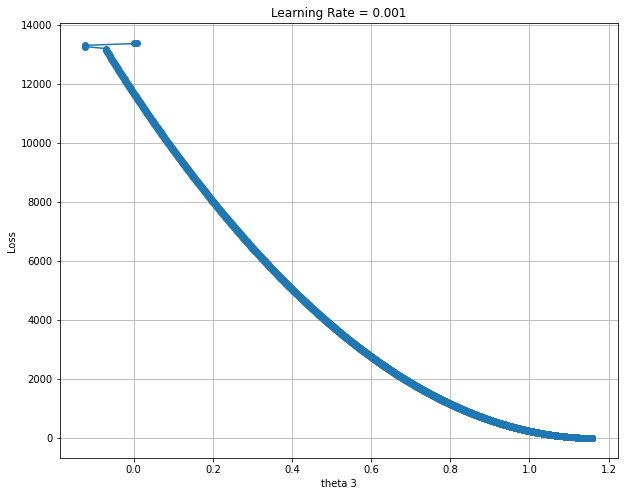

In [23]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.01 and max. iterations = 5000.

In [24]:
alpha = 0.01
iterations = 5000
theta_list, cost, hypothesis, theta_opt = BFGS_multi_variable_batch(X, y, iterations, alpha)

Streaming output truncated to the last 5000 lines.
 [-0.42257587]
 [-0.33634224]
 [-7.31110609]
 [ 1.63279844]
 [-0.80458842]]

j =  [[2.86890357]]

Gradient Vector:
 [[-1.38189802e-08]
 [-1.11545569e-06]
 [-1.11826362e-06]
 [-1.15001760e-06]]

Gradient Vector Norm:
 1.9538388787662934e-06

thetas_new : 
  [[-4.3361024 ]
 [ 0.35593822]
 [ 0.54251876]
 [ 1.16744422]]

****************** Iteration 2304 ********************

h(x):
 [[152.60720438]
 [185.0801147 ]
 [181.78158545]
 [199.74522645]
 [139.17472069]
 [103.69391792]
 [150.26322739]
 [112.82069727]
 [174.55948392]
 [164.49442092]
 [143.4233755 ]
 [142.23416414]
 [186.54285757]
 [152.40794526]
 [151.24409107]
 [189.12496611]
 [143.50219217]
 [181.8938936 ]
 [177.29838913]
 [158.34934018]
 [176.57742413]
 [174.66365776]
 [167.68889391]
 [150.63279844]
 [191.19541158]]

Error Vector:
 [[ 0.60720438]
 [ 0.0801147 ]
 [ 1.78158545]
 [ 3.74522645]
 [-2.82527931]
 [ 2.69391792]
 [ 1.26322739]
 [-2.17930273]
 [-0.44051608]
 [ 0.49442092]


In [25]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9896615789448399


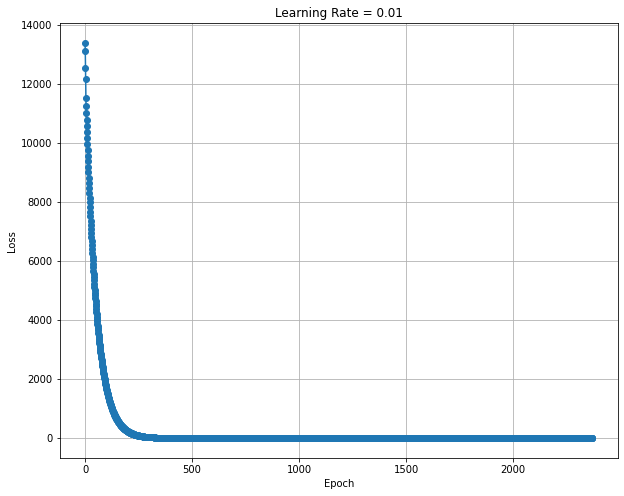

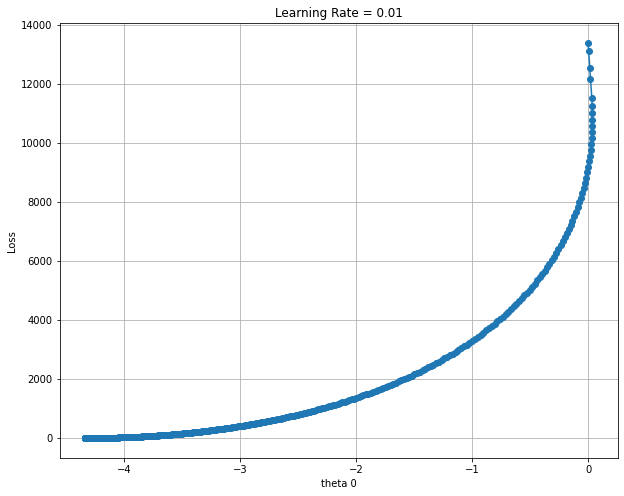

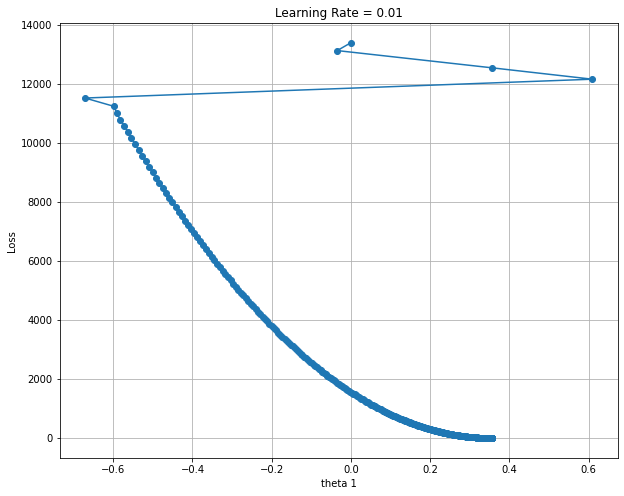

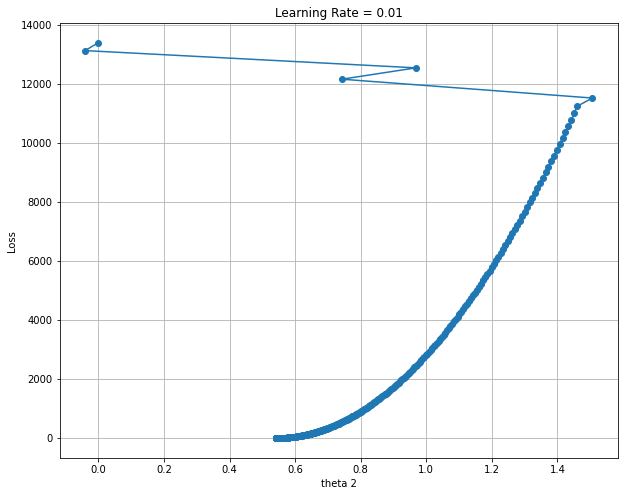

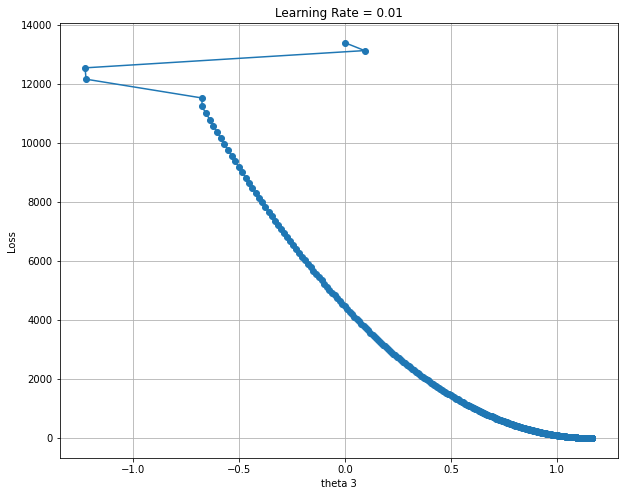

In [26]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')